In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("survey_results_public.csv", index_col="Respondent", usecols=["Respondent","MainBranch","Hobbyist"])

df["MainBranch"] = df["MainBranch"].str.replace("I am not primarily a developer, but I write code sometimes as part of my work","I am not primarily a developer, but I \nwrite code sometimes as part of my work")
df["MainBranch"] = df["MainBranch"].str.replace('I used to be a developer by profession, but no longer am','I used to be a developer by profession, \nbut no longer am')

df["MainBranch"] = df["MainBranch"].astype("category")
df["Hobbyist"] = df["Hobbyist"].astype("category")

df.head()

,MainBranch,Hobbyist
Respondent,,
1,I am a student who is learning to code,Yes
2,I am a student who is learning to code,No
3,"I am not primarily a developer, but I \nwrite ...",Yes
4,I am a developer by profession,No
5,I am a developer by profession,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88883 entries, 1 to 88863
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   MainBranch  88331 non-null  category
 1   Hobbyist    88883 non-null  category
dtypes: category(2)
memory usage: 868.3 KB


In [4]:
df_1 = df.groupby(["MainBranch","Hobbyist"]).size().to_frame(name='count').reset_index()
df_1.head()

,MainBranch,Hobbyist,count
0,I am a developer by profession,No,13671
1,I am a developer by profession,Yes,52008
2,I am a student who is learning to code,No,1668
3,I am a student who is learning to code,Yes,8521
4,"I am not primarily a developer, but I \nwrite ...",No,1692


In [5]:
df_1_1 = df_1.groupby("Hobbyist")["count"].sum().sort_values(ascending=False).to_frame().reset_index()
df_1_1["percent"] = round((100.*df_1_1["count"]/df_1_1["count"].sum()),1)
df_1_1

,Hobbyist,count,percent
0,Yes,70962,80.3
1,No,17369,19.7


In [6]:
df_1_2 = df_1.groupby("MainBranch")["count"].sum().sort_values(ascending=False).to_frame().reset_index()
df_1_2["percent"] = round((100.*df_1_2["count"]/df_1_2["count"].sum()),1)
df_1_2

,MainBranch,count,percent
0,I am a developer by profession,65679,74.4
1,I am a student who is learning to code,10189,11.5
2,"I am not primarily a developer, but I \nwrite ...",7539,8.5
3,I code primarily as a hobby,3340,3.8
4,"I used to be a developer by profession, \nbut ...",1584,1.8


In [7]:
df_2 = df_1.pivot_table(index="MainBranch", columns="Hobbyist", values="count")
df_2 = df_2.reindex(df_1_1["Hobbyist"], axis=1)  
df_2

Hobbyist,Yes,No
MainBranch,,
I am a developer by profession,52008,13671
I am a student who is learning to code,8521,1668
"I am not primarily a developer, but I \nwrite code sometimes as part of my work",5847,1692
I code primarily as a hobby,3340,0
"I used to be a developer by profession, \nbut no longer am",1246,338


In [8]:
df_2_per = round(((df_2 / df_2.sum().sum())*100),2)
df_2_1 = df_2.astype(str) + '\n' + '(' + df_2_per.astype(str) + ' %)'
df_2_1

Hobbyist,Yes,No
MainBranch,,
I am a developer by profession,52008\n(58.88 %),13671\n(15.48 %)
I am a student who is learning to code,8521\n(9.65 %),1668\n(1.89 %)
"I am not primarily a developer, but I \nwrite code sometimes as part of my work",5847\n(6.62 %),1692\n(1.92 %)
I code primarily as a hobby,3340\n(3.78 %),0\n(0.0 %)
"I used to be a developer by profession, \nbut no longer am",1246\n(1.41 %),338\n(0.38 %)


In [9]:
df_3 = df_1.pivot_table(index="Hobbyist", columns="MainBranch", values="count")
df_3 = df_3.reindex(df_1_1["Hobbyist"], axis=0)
df_3

MainBranch,I am a developer by profession,I am a student who is learning to code,"I am not primarily a developer, but I \nwrite code sometimes as part of my work",I code primarily as a hobby,"I used to be a developer by profession, \nbut no longer am"
Hobbyist,,,,,
Yes,52008,8521,5847,3340,1246
No,13671,1668,1692,0,338


In [10]:
df_3_per = round(((df_3 / df_3.sum().sum())*100),2)
df_3_1 = df_3.astype(str) + '\n' + '(' + df_3_per.astype(str) + ' %)'
df_3_1

# df_3_1 = df_3_1.transpose()
# df_3_1

MainBranch,I am a developer by profession,I am a student who is learning to code,"I am not primarily a developer, but I \nwrite code sometimes as part of my work",I code primarily as a hobby,"I used to be a developer by profession, \nbut no longer am"
Hobbyist,,,,,
Yes,52008\n(58.88 %),8521\n(9.65 %),5847\n(6.62 %),3340\n(3.78 %),1246\n(1.41 %)
No,13671\n(15.48 %),1668\n(1.89 %),1692\n(1.92 %),0\n(0.0 %),338\n(0.38 %)


<h1 style='color:red'>FUNCTIONS</h1>

In [11]:
######################
# ax1 (top)
######################
def total_bar_graph_annotate(df):
    for idx, acc in enumerate(list(df.columns)): 
        value=df[acc].sum()
        percent = f"({value} - {value*100/df_1['count'].sum():1.1f}%)" 
#         percent = f"({value} - {value*100/df.sum().sum():1.1f}%)" 
        ax1.annotate(percent, xy=(value+300, idx), xycoords="data",   
                        va='center', ha='left', rotation=0)
    
######################
# ax2 (bottom-left)
######################
def table_customization (table, df, index, columns, min, max):
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    cellDict = table.get_celld()

    for i in range(0,len(index)):
        for j in range(0,len(columns)):
            if i==0:
                cellDict[(i,j)].set_height(0.07)
                cellDict[(i,j)].set_width(0.10)

    for i in range(1,len(index)+1):
        cellDict[(i,-1)].set_height(0.17)
        cellDict[(i,-1)].set_width(0.30)
        cellDict[(i,-1)].set_fontsize(10)
        cellDict[(i,-1)].set_text_props(weight='bold', color='k')
        for j in range(0,len(columns)):
            cellDict[(i,j)].set_height(0.17)
            if (i%2 == 0):
                cellDict[(i,j)].set_facecolor('gainsboro')
            else:
                cellDict[(i,j)].set_facecolor('w')

        for i,[j,k] in enumerate(df.iterrows(), start=1):
            for m, l in enumerate(k):
                if (l<min):
                    cellDict[(i,m)].set_facecolor('y')
                elif l>max:
                    cellDict[(i,m)].set_facecolor('g')

######################
# ax3 (bottom-middle)
######################
def autopct(pct, allvals):
    if pct<5:
        return ""
    else:
        absolute = int(pct/100.*sum(allvals))
        return "{p:.1f}%".format(p=pct)
#         return "{p:.1f}% \n({val})".format(p=pct, val=absolute)              
                
def pie_annotate(ax, df, wedges, angleA, x1, y1):
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center", ha="center")

    df_filt = df[(df["count"] != 0) & (df["percent"]<5)]
    values = [f"{i:1.1f}%" for i,j in zip(df["percent"], df["count"])]

    for i, p in enumerate(wedges):
        if i in df_filt.index:
            ang = (p.theta2 - p.theta1)/2. + p.theta1
            y = np.sin(np.deg2rad(ang))
            x = np.cos(np.deg2rad(ang))
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = f"angle,angleA={angleA},angleB={ang}"
            kw["arrowprops"].update({"connectionstyle": connectionstyle})
            ax.annotate(values[i], xy=(x, y), xytext=(x1*np.sign(x), y1*y),
                        horizontalalignment=horizontalalignment, **kw)

<h1 style='color:red'>GRAPHS-1</h1>

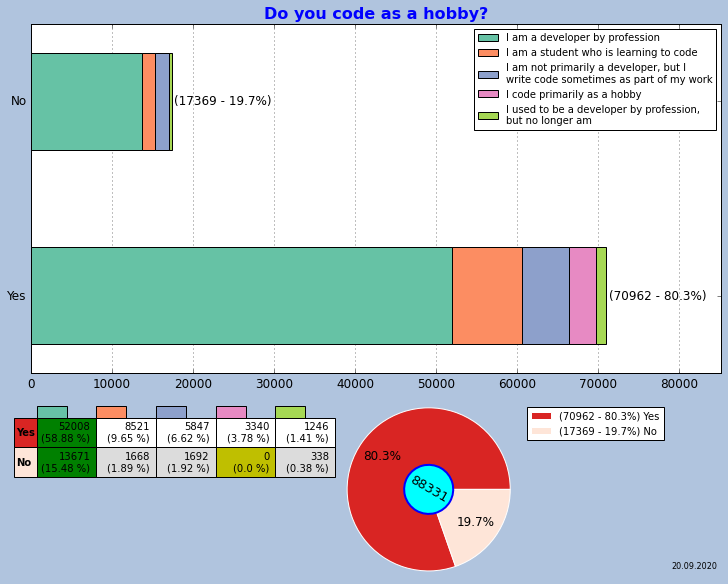

In [12]:
%matplotlib inline
fig = plt.figure(constrained_layout=True, figsize=(10,8), facecolor='lightsteelblue')
plt.figtext(0.99, 0.02, "20.09.2020", horizontalalignment='right', size=8, weight='light')
matplotlib.style.use('classic')

widths = [1.8, 1, 1.2]
heights = [2, 1]
gs_kw = dict(height_ratios=heights)
gs = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
######################
# ax1 (top)
######################
index = np.arange(len(df_2.columns))
bar_width = 0.5
y_offset = np.zeros(len(df_2.columns))

cmap_red = plt.get_cmap('Reds')
colors_row = cmap_red(np.linspace(0.7, 0.1, len(df_2.columns)))
cmap = plt.get_cmap("Set2")
colors_column = []
for i in range(0,len(df_3.columns)):
    colors_column.append(cmap(i))

cell_text = []
for i in range(len(df_2)):
    ax1.barh(index, df_2.values[i], bar_width, left=y_offset, color=cmap(i), zorder=3)
    y_offset = y_offset + df_2.values[i]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])

total_bar_graph_annotate(df_2) #------function
######################
# ax2 (bottom-left)
######################
df_3_empty_col = [""]*(len(df_3.columns)+1)
table_1 = ax2.table(cellText=df_3_1.values, rowLabels=df_3.index, colLabels=df_3_empty_col, loc="upper left", zorder=3, 
                    rowColours=colors_row, colColours=colors_column,)

table_customization(table=table_1, df=df_3, index=df_3.index, columns=df_3.columns, min=100, max=10000) #------function
######################
# ax3 (bottom-middle)
######################
textprops = dict(horizontalalignment="center", verticalalignment="center", rotation=0, rotation_mode="anchor",
                size=12, color="black")
wedgeprops=dict(width=1, edgecolor="w", linewidth=1)

wedges, texts, autotexts = ax3.pie(df_1_1["count"], radius=1, startangle=0, 
                            autopct=lambda pct: autopct(pct, df_1_1["count"]), #------function
                            textprops=textprops, wedgeprops=wedgeprops,
                            counterclock=True, pctdistance = 0.7, colors=colors_row)

pie_annotate(ax3, df_1_1, wedges, 180, 1, 1) #------function

# Circle
bbox_props = dict(boxstyle="circle,pad=0.3", fc="cyan", ec="b", lw=2)
ax3.text(0, 0, df_3.sum().sum(), ha="center", va="center", rotation=-30, size=13, bbox=bbox_props)  
######################
# ax4 (bottom-right)
######################
labels = [f"({k} - {j:1.1f}%) {i}" for i,j,k in zip(df_1_1["Hobbyist"], df_1_1["percent"], df_1_1["count"])]
ax4.legend(wedges, labels, fontsize=10, loc="upper left", prop={'size': 10})
#---------------------------------------------------------------#
########################################################################################
ax1.legend(df_2.index, fontsize=10, bbox_to_anchor=(1,1,0,0))
ax1.set_title("Do you code as a hobby?", fontsize=16, color='b', weight='bold')
ax1.grid(axis='x', zorder=0)
ax1.set_yticks(range(len(df_2.columns)))
ax1.set_yticklabels(df_2.columns, fontsize=12)
ax1.set_xlim([0, int(df_1_1["count"].max())*1.2])
# ax1.invert_yaxis()
ax2.axis("off")
ax3.axis("off")
ax3.axis('equal')
ax4.axis("off")
########################################################################################
plt.show()

<h1 style='color:red'>GRAPHS-2</h1>

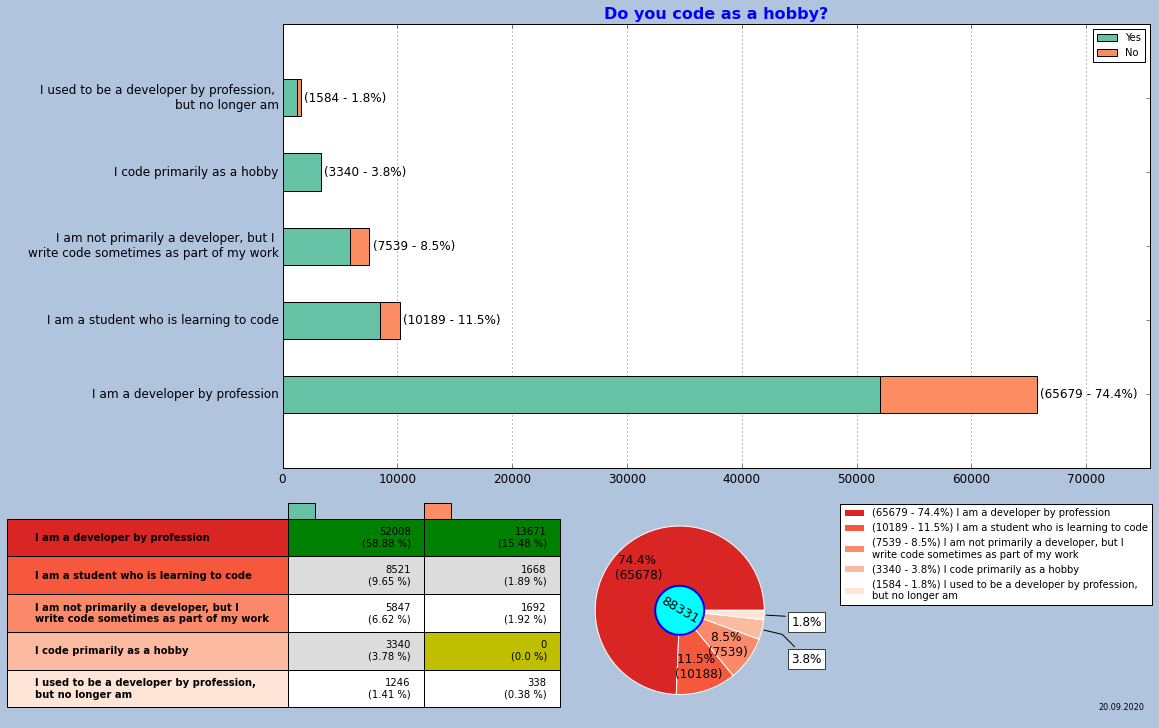

In [18]:
%matplotlib inline
fig = plt.figure(constrained_layout=True, figsize=(16,10), facecolor='lightsteelblue')
plt.figtext(0.99, 0.02, "20.09.2020", horizontalalignment='right', size=8, weight='light')
matplotlib.style.use('classic')

widths = [1.3, 1, 1.5]
heights = [2, 1]
gs_kw = dict(height_ratios=heights)
gs = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
######################
# ax1 (top)
######################
index = np.arange(len(df_3.columns))
bar_width = 0.5
y_offset = np.zeros(len(df_3.columns))

cmap_red = plt.get_cmap('Reds')
colors_row = cmap_red(np.linspace(0.7, 0.1, len(df_3.columns)))
cmap = plt.get_cmap("Set2")    
colors_column = []
for i in range(0,len(df_2.columns)):
    colors_column.append(cmap(i))

cell_text = []
for i in range(len(df_3)):
    ax1.barh(index, df_3.values[i], bar_width, left=y_offset, color=cmap(i), zorder=3)
    y_offset = y_offset + df_3.values[i]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])

total_bar_graph_annotate(df_3)
######################
# ax2 (bottom-left)
######################
df_2_empty_col = [""]*(len(df_2.columns)+1)
table_2 = ax2.table(cellText=df_2_1.values, rowLabels=df_2.index, colLabels=df_2_empty_col, loc="upper left", zorder=3, 
                    rowColours=colors_row, colColours=colors_column,)

table_customization(table=table_2, df=df_2, index=df_2.index, columns=df_2.columns, min=100, max=10000)
######################
# ax3 (bottom-middle)
######################
textprops = dict(horizontalalignment="center", verticalalignment="center", rotation=0, rotation_mode="anchor",
                size=12, color="black")
wedgeprops=dict(width=1, edgecolor="w", linewidth=1)

wedges, texts, autotexts = ax3.pie(df_1_2["count"], radius=1, startangle=0, 
                            autopct=lambda pct: autopct(pct, df_1_2["count"]), #------function
                            textprops=textprops, wedgeprops=wedgeprops,
                            counterclock=True, pctdistance = 0.7, colors=colors_row)

pie_annotate(ax3, df_1_2, wedges, 135, 1.5, 2.5) #------function

# Circle
bbox_props = dict(boxstyle="circle,pad=0.3", fc="cyan", ec="b", lw=2)
ax3.text(0, 0, df_3.sum().sum(), ha="center", va="center", rotation=-30, size=13, bbox=bbox_props)    

######################
# ax4 (bottom-right)
######################

# labels_OS_1 = [f"({i:}) {j}" for i,j in zip(df_1_2.values, df_1_2.index)]
# ax4.legend(pie[0], labels_OS_1, fontsize=10, loc="upper left")

labels = [f"({k} - {j:1.1f}%) {i}" for i,j,k in zip(df_1_2["MainBranch"], df_1_2["percent"], df_1_2["count"])]
ax4.legend(wedges, labels, fontsize=10, loc="upper left", prop={'size': 10})
#---------------------------------------------------------------#
########################################################################################
ax1.legend(df_3.index, fontsize=10, bbox_to_anchor=(1,1,0,0))
ax1.set_title("Do you code as a hobby?", fontsize=16, color='b', weight='bold')
ax1.grid(axis='x', zorder=0)
ax1.set_yticks(range(len(df_3.columns)))
ax1.set_yticklabels(df_3.columns, fontsize=12)
ax1.set_xlim([0, int(df_1_2["count"].max())*1.15])
ax2.axis("off")
ax3.axis('equal')
ax4.axis("off")
########################################################################################
plt.show()

In [14]:
df_s1 = df.groupby("MainBranch").size().to_frame(name='count').reset_index()
df_s1["percent"] = round((100.*df_1["count"]/df_1["count"].sum()),1)
df_s1

,MainBranch,count,percent
0,I am a developer by profession,65679,15.5
1,I am a student who is learning to code,10189,58.9
2,"I am not primarily a developer, but I \nwrite ...",7539,1.9
3,I code primarily as a hobby,3340,9.6
4,"I used to be a developer by profession, \nbut ...",1584,1.9


In [15]:
def autopct(pct, allvals):
    if pct<5:
        return ""
    else:
        absolute = int(pct/100.*sum(allvals))
        return "{p:.1f}% \n({val})".format(p=pct, val=absolute)

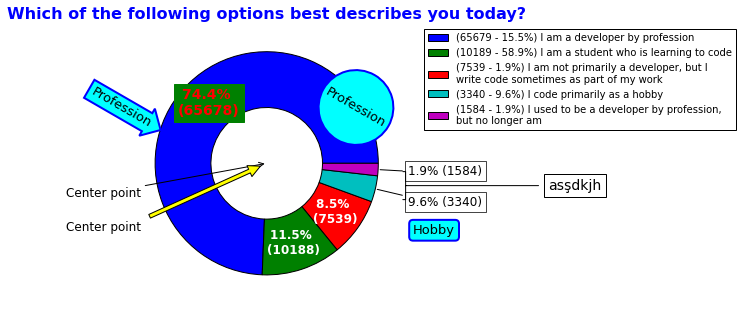

In [16]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(aspect="equal"))
matplotlib.style.use('classic')

#################################################################
textprops = dict(horizontalalignment="center", verticalalignment="center", rotation=0, rotation_mode="anchor",
                size=12, weight= "bold", color="white")
wedgeprops=dict(width=0.5, edgecolor="black", linewidth=1)

labels = [f"({k} - {j:1.1f}%) {i}" for i,j,k in zip(df_s1["MainBranch"], df_s1["percent"], df_s1["count"])]
#################################################################
#---------------------------------------------------------------#
wedges, texts, autotexts = ax.pie(df_s1["count"], autopct=lambda pct: autopct(pct, df_s1["count"]), textprops=textprops,
radius=1, startangle=0, counterclock=True, pctdistance = 0.75, wedgeprops=wedgeprops)
#---------------------------------------------------------------#
#################################################################
#---------------------------------------------------------------#
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center", ha="center")

values_2 = [f"{i:1.1f}% ({j})" for i,j in zip(df_s1["percent"], df_s1["count"])]

for i, p in enumerate(wedges):
    if i==3:
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        plt.annotate(values_2[i], xy=(x, y), xytext=(1.6*np.sign(x), 1.5*y),
                    horizontalalignment=horizontalalignment, **kw)
    if i==4:
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        plt.annotate(values_2[i], xy=(x, y), xytext=(1.6*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)    
#---------------------------------------------------------------#
for i,tx in enumerate(autotexts):
    if i == 0:
        tx.set_color("r")
        tx.set_size("14")
        tx.set_backgroundcolor("g")
    if 0 < i <3:
        tx.set_color("w")
        tx.set_size("12")

#---------------------------------------------------------------#
# LArrow, LArrow, DArrow
bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="cyan", ec="b", lw=2)
ax.text(-1.3, 0.5, "Profession", ha="center", va="center", rotation=-30, size=13,
            bbox=bbox_props)
            
# Circle
bbox_props = dict(boxstyle="circle,pad=0.3", fc="cyan", ec="b", lw=2)
ax.text(+0.8, 0.5, "Profession", ha="center", va="center", rotation=-30, size=13,
            bbox=bbox_props)
            
# connectionstyle  
ax.annotate("Center point", xy=(0, 0), xycoords='data', xytext=(-1.8, -0.3), 
            arrowprops=dict(facecolor='r', arrowstyle="->", connectionstyle="arc3"))

# shrink       
ax.annotate("Center point", xy=(0, 0), xycoords='data', xytext=(-1.8, -0.6), 
            arrowprops=dict(facecolor='yellow', shrink=0.05, connectionstyle="arc3"))   
            
# Round, Round4, Roundtooth, Sawtooth, Square
bbox_props = dict(boxstyle="round,pad=0.3", fc="cyan", ec="b", lw=2)
ax.text(+1.5, -0.6, "Hobby", ha="center", va="center", rotation=0, size=13,
            bbox=bbox_props)

ax.annotate('asşdkjh', xy=(1.2, -0.2), xycoords='data',
                xytext=(3, -0.2), textcoords='data',
                ha="right", va="center",
                size=14,
                arrowprops=dict(arrowstyle='-[', shrinkA=5, shrinkB=5, fc="k", ec="k",
                                connectionstyle="arc3,rad=0",),
                bbox=dict(boxstyle="square", fc="w"))
#---------------------------------------------------------------#
#################################################################

ax.set_title("Which of the following options best describes you today?", color="b", size=16, weight="bold")
plt.legend(labels=labels, fontsize=10, bbox_to_anchor=(1.8, 0, 0.4, 1))
plt.show()